# WiTracing Result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns
import pandas as pd

import IPython
from IPython.display import clear_output

In [2]:
CSV_FILE = "../data/preprocessed_data.csv"
OUT_CSV_FILE = '../data/data.csv"'

In [3]:
def preprocess(df):
    df['tx'] = df['tx'].str.lower()
    df['x'] = df['x'].round(2)
    df['y'] = df['y'].round(2)
    df['z'] = df['z'].round(2)
    return df

df = pd.read_csv(CSV_FILE)
df = preprocess(df)
df

,tx,x,y,z,rssi,timestamp
0,tx8,-572.51,669.33,686.66,-56,1666422538832
1,tx9,-572.51,669.33,686.66,-56,1666422538906
2,tx10,-572.51,669.33,686.66,-59,1666422538918
3,tx12,-572.51,669.33,686.66,-62,1666422538928
4,tx13,-572.51,669.33,686.66,-51,1666422538937
...,...,...,...,...,...,...
178375,tx23,-922.72,-917.53,686.55,-255,1666425276475
178376,tx25,-922.72,-917.53,686.55,-65,1666425276488
178377,tx6,-922.72,-917.53,686.55,-58,1666425276507
178378,tx4,-922.72,-917.53,686.55,-74,1666425276520


### X-Y Coordinates for All Measurement

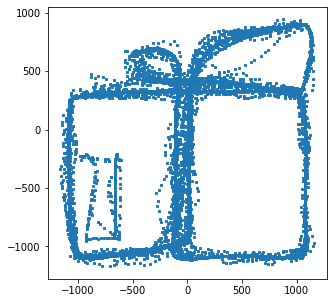

In [4]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df.x, df.y, s=1)
plt.show()

### X-Y Coordinates for Single TX

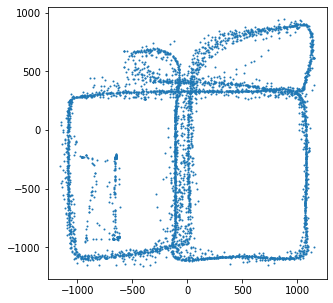

In [5]:
tx_df = df[df.tx == 'tx4']
fig = plt.figure(figsize=(5,5))
plt.scatter(tx_df.x, tx_df.y, s=1)
plt.show()

In [6]:
list(df.tx.unique())

['tx8',
 'tx9',
 'tx10',
 'tx12',
 'tx13',
 'tx14',
 'tx15',
 'tx16',
 'tx17',
 'tx18',
 'tx19',
 'tx20',
 'tx21',
 'tx22',
 'tx23',
 'tx24',
 'tx25',
 'tx26',
 'tx7',
 'tx6',
 'tx5',
 'tx4',
 'tx3',
 'tx2',
 'tx1',
 'tx0']

### Format Raw Data

In [7]:
def formating(df):
    prev_xyz = [0,0,0]
    tx_num = len(df.tx.unique())
    columns = ['t', 'x', 'y', 'z'] + list(df.tx.unique())
    prep_df = pd.DataFrame(columns = columns)
    
    # although using concat method can significantly improve the the efficiency in this part, but we need to process one-by-one in the wi tracing system
    total = len(df)
    for num, row in df.iterrows():
        xyz = [row['x'], row['y'], row['z']]
        # if coordinate change
        index = len(prep_df.index)
        if prev_xyz != xyz:
            prep_df.loc[index] = [row['timestamp'], xyz[0], xyz[1], xyz[2]] + [-255] * tx_num
            prev_xyz = xyz
            prep_df.at[index, row['tx']] = row['rssi']
        else:
            prep_df.at[index - 1, row['tx']] = row['rssi']
        clear_output(wait=True)
        progress = round(num / total * 100, 2)
        print(f'Progress: { progress:.2f} %')
    return prep_df

In [ ]:
prep_df = formating(df)
display(prep_df)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [9]:
prep_df.to_csv('../data/data.csv', index=False)